# Assignment 4 

### Part 1: Comparison of weekdays
##### For each day of the week, plot the histogram of the actual number of surgeries. Are the average and standard deviation for the number of surgeries on each day of the week (Monday to Friday) the same? Perform appropriate hypothesis tests and discuss the results. Is there a specific day of the week with a relatively higher average than the others? What could be the reason for the higher average? (25%)

Make all the imports here

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
path = "Vanderbilt University Medical Center Elective Surgery Schedule-Solution (1).xlsx"
surgery_original_data = pd.read_excel(path)
print(surgery_original_data.head())

    SurgDate  DOW  T - 28  T - 21  T - 14  T - 13  T - 12  T - 11  T - 10  \
0 2011-10-10  Mon      38      45      60      63      65      70      73   
1 2011-10-11  Tue      35      47      65      68      78      82      82   
2 2011-10-12  Wed      26      43      54      62      72      72      72   
3 2011-10-13  Thu      28      48      65      70      72      72      72   
4 2011-10-14  Fri      31      40      50      50      50      54      62   

   T - 9  T - 8  T - 7  T - 6  T - 5  T - 4  T - 3  T - 2  T - 1  Actual  
0     73     73     80     84     89     94     98    100    104     106  
1     82     86     89     92     95     99     99     99    114     121  
2     74     87     94     96    101    102    102    106    114     126  
3     82     87     91     94     94     94     97     98    103     114  
4     68     71     73     73     73     78     83     87     94     106  


Extracting the unique days of week from the ${DOW}$ column

In [44]:
unique_days = surgery_original_data['DOW'].unique()
print(unique_days)

['Mon' 'Tue' 'Wed' 'Thu' 'Fri']


Plotting the histogram of the actual number of surgeries for each day of the week

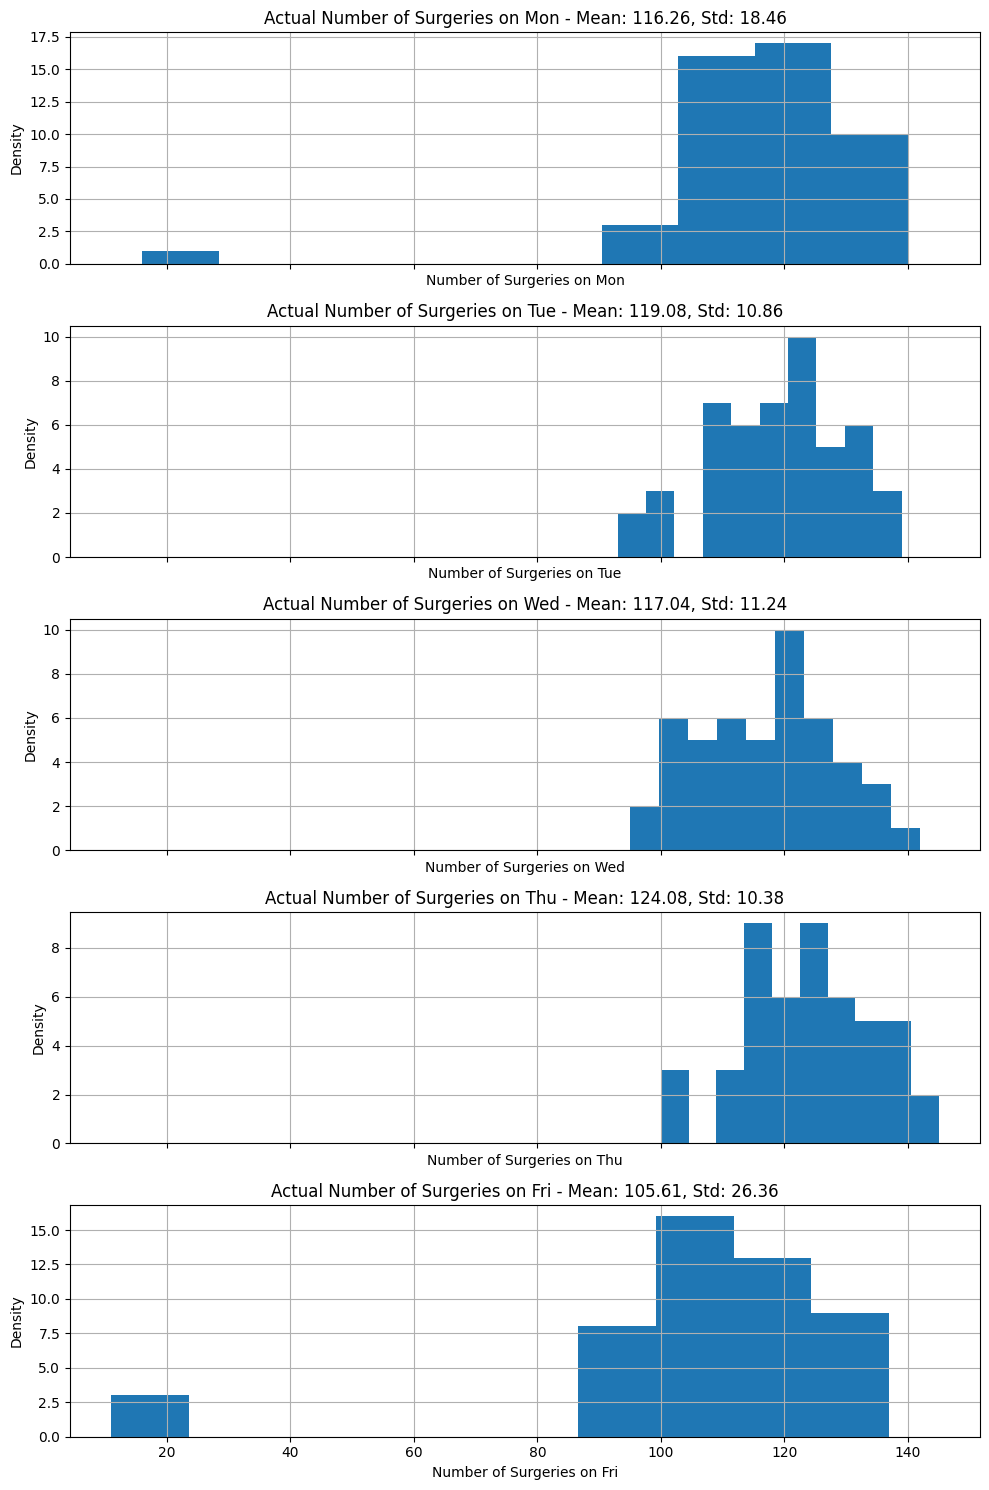

In [45]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex = True, figsize=(10,15))
ax = [ax1, ax2, ax3, ax4, ax5]
means = {}
stds = {}
for i in range(len(unique_days)):
    data = surgery_original_data[surgery_original_data['DOW'] == unique_days[i]]['Actual']
    _ = ax[i].hist(data)
    means[unique_days[i]] = data.mean().round(2)
    stds[unique_days[i]] = data.std().round(2)
    ax[i].set_title("Actual Number of Surgeries on {} - Mean: {}, Std: {}".format(unique_days[i], means[unique_days[i]], stds[unique_days[i]]))
    ax[i].set_xlabel("Number of Surgeries on {}".format(unique_days[i]))
    ax[i].set_ylabel("Density")
    ax[i].grid(True)
plt.tight_layout()

No, the means and the standard deviations of each day of week are not the same. They are close to each other. 

##### To analyse if there is a significant difference in the means of the days of week, we conduct a hypothesis testing

${H_0}$: The means are equal for the actual number of surgeries of each day of the week $\mu_{Mon} = \mu_{Tue} = \mu_{Wed} = \mu_{Thu} = \mu_{Fri}$
<br>
${H_1}$: Atleast 2 of the means are not equal for the actual number of surgeries of each day of the week $\mu_{Mon} \ne \mu_{Tue} \ne \mu_{Wed} \ne \mu_{Thu} \ne \mu_{Fri}$

In [46]:
samples_mon = surgery_original_data[surgery_original_data['DOW'] == unique_days[0]]['Actual']
samples_tue = surgery_original_data[surgery_original_data['DOW'] == unique_days[1]]['Actual']
samples_wed = surgery_original_data[surgery_original_data['DOW'] == unique_days[2]]['Actual']
samples_thu = surgery_original_data[surgery_original_data['DOW'] == unique_days[3]]['Actual']
samples_fri = surgery_original_data[surgery_original_data['DOW'] == unique_days[4]]['Actual']

In [47]:
statistic, p_value = stats.f_oneway(samples_mon, samples_tue, samples_wed, samples_thu, samples_fri)
print('One Factor ANOVA for Average Number of Surgeries on different days of the week (actual): \nstatistic = {}, p_value = {}'.format\
    (statistic.round(decimals=4), p_value.round(decimals=6)))

One Factor ANOVA for Average Number of Surgeries on different days of the week (actual): 
statistic = 8.0027, p_value = 5e-06


From the 1-Factor ANOVA test, we obtain a significantly higher p-value ($5\mathrm{e}^{-6}$) for the average number of surgeries on different days of the week. Since this is lower than $\alpha$ = 0.05, we reject the null hypothesis. 
<br>
Hence, atleast 2 of the means are not equal ($\mu_{Mon} \ne \mu_{Tue} \ne \mu_{Wed} \ne \mu_{Thu} \ne \mu_{Fri}$). So, statistically, there is **a significant difference in the average number of surgeries on different days of the week (Actual)**.

##### To analyse if there is a significant difference in the standard deviations of the days of week, we conduct a hypothesis testing

${H_0}$: The std deviations are equal for the actual number of surgeries of each day of the week $\sigma_{Mon}^2 = \sigma_{Tue}^2 = \sigma_{Wed}^2 = \sigma_{Thu}^2 = \sigma_{Fri}^2$
<br>
<br>
${H_1}$: Atleast 2 of the standard deviations are not equal for the actual number of surgeries of each day of the week $\sigma_{Mon}^2 \ne \sigma_{Tue}^2 \ne \sigma_{Wed}^2 \ne \sigma_{Thu}^2 \ne \sigma_{Fri}^2$

In [48]:
statistic, p_value = stats.bartlett(samples_mon, samples_tue, samples_wed, samples_thu, samples_fri)
print("Bartlett's test for homogeneity of variances of actual number of surgeries on different days of the week: \nstatistic = {}, p_value = {}".format\
    (statistic.round(decimals=4), p_value.round(decimals=14)))

Bartlett's test for homogeneity of variances of actual number of surgeries on different days of the week: 
statistic = 69.1103, p_value = 3e-14


From the Bartlett's test, we obtain a significantly higher p-value ($3\mathrm{e}^{-14}$) for the standard deviations of the number of surgeries. Since this is lower than $\alpha$ = 0.05, we reject the null hypothesis. 
<br>
Hence, atleast 2 of the means are not equal ($\sigma_{Mon}^2 \ne \sigma_{Tue}^2 \ne \sigma_{Wed}^2 \ne \sigma_{Thu}^2 \ne \sigma_{Fri}^2$). So, statistically, there is **a significant difference in the standard deviations of surgeries on different days of the week (Actual)**.

### Part 2: Longer prediction time and precision trade-off
##### Ajay Bose would like to predict the final number of surgeries on a specific day, using the data of scheduled surgeries. However, he doesn’t know how many days before the desired date, he could predict the demand. Note that the sooner he predicts, the more error in prediction he will probably observe. Divide the data into 80 percent training and 20 percent testing. Consider the first model discussed in the class and calculate MSE (mean square error) on the test set for T − 5, T − 6, T − 7, T − 8, T − 9 as predictors. Visualize the data and discuss the trade-off between sooner prediction and an increase in error. Do the same steps for R2 values. Which day do you suggest as the predictor? (35%)

According to our first model (as discussed in class), 
##### Predictors - (T-5), (T-6), (T-7), (T-8), (T-9)

In [28]:
x_data = surgery_original_data[['T - 5', 'T - 6', 'T - 7', 'T - 8', 'T - 9']]
y_data = surgery_original_data[['Actual']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at $({T-5})$)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-5)}$

In [95]:
model = LinearRegression().fit(x_train[['T - 5']], y_train)
predictions = model.predict(x_test[['T - 5']])

results = pd.DataFrame(columns=['Model', 'MSE', 'Coefficient', 'Intercept', 'R-squared'])

mse = mean_squared_error(y_test.values, predictions).round(2)
r_squared = model.score(x_test[['T - 5']], y_test).round(3)

coeff = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

new_row = pd.DataFrame({'Model':'T - 5', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                         'R-squared': r_squared}, index=[results['MSE'].size])
    
results = pd.concat([results, new_row], ignore_index=True)

Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at $({T-6})$)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-6)}$

In [96]:
model = LinearRegression().fit(x_train[['T - 6']], y_train)
predictions = model.predict(x_test[['T - 6']])

mse = mean_squared_error(y_test.values, predictions).round(2)
r_squared = model.score(x_test[['T - 6']], y_test).round(3)
coeff = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

new_row = pd.DataFrame({'Model':'T - 6', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results['MSE'].size])

results = pd.concat([results, new_row], ignore_index=True)

Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at $({T-7})$)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-7)}$

In [97]:
model = LinearRegression().fit(x_train[['T - 7']], y_train)
predictions = model.predict(x_test[['T - 7']])

mse = mean_squared_error(y_test.values, predictions).round(2)
r_squared = model.score(x_test[['T - 7']], y_test).round(3)
coeff = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

new_row = pd.DataFrame({'Model':'T - 7', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results['MSE'].size])
results = pd.concat([results, new_row], ignore_index=True)

Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at $({T-8})$)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-8)}$

In [98]:
model = LinearRegression().fit(x_train[['T - 8']], y_train)
predictions = model.predict(x_test[['T - 8']])

mse = mean_squared_error(y_test.values, predictions).round(2)
r_squared = model.score(x_test[['T - 8']], y_test).round(3)
coeff = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

new_row = pd.DataFrame({'Model':'T - 8', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results['MSE'].size])   
results = pd.concat([results, new_row], ignore_index=True)

Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at $({T-9})$)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-9)}$

In [99]:
model = LinearRegression().fit(x_train[['T - 9']], y_train)
predictions = model.predict(x_test[['T - 9']])

mse = mean_squared_error(y_test.values, predictions).round(2)
r_squared = model.score(x_test[['T - 9']], y_test).round(3)
coeff = model.coef_[0][0].round(2)
intercept = model.intercept_[0].round(2)

new_row = pd.DataFrame({'Model':'T - 9', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results['MSE'].size])   
results = pd.concat([results, new_row], ignore_index=True)
results

,Model,MSE,Coefficient,Intercept,R-squared
0,T - 5,43.00,0.95,29.12,0.699
1,T - 6,43.85,0.96,30.12,0.693
2,T - 7,45.47,1.01,29.83,0.682
3,T - 8,51.48,1.03,31.74,0.639
4,T - 9,82.61,1.07,32.97,0.421


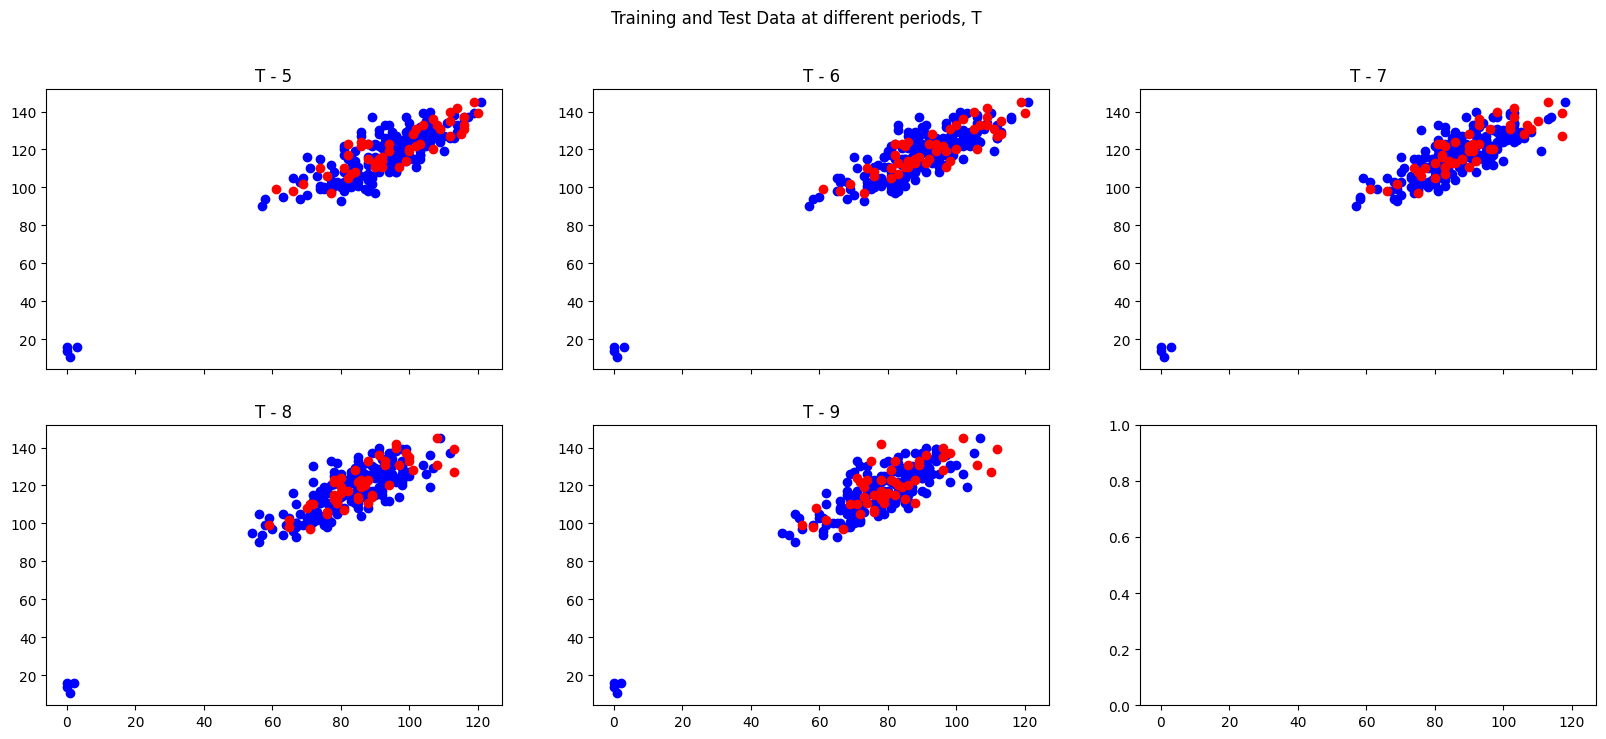

In [100]:
fig, axs = plt.subplots(2, 3, sharex=True, figsize=(20,8))
plt.suptitle("Training and Test Data at different periods, T")

axs[0, 0].set_title("T - 5")
axs[0, 0].scatter(x_train[['T - 5']], y_train, color='blue')
axs[0, 0].scatter(x_test[['T - 5']], y_test, color='red')

axs[0, 1].set_title("T - 6")
axs[0, 1].scatter(x_train[['T - 6']], y_train, color='blue')
axs[0, 1].scatter(x_test[['T - 6']], y_test, color='red')

axs[0, 2].set_title("T - 7")
axs[0, 2].scatter(x_train[['T - 7']], y_train, color='blue')
axs[0, 2].scatter(x_test[['T - 7']], y_test, color='red')

axs[1, 0].set_title("T - 8")
axs[1, 0].scatter(x_train[['T - 8']], y_train, color='blue')
axs[1, 0].scatter(x_test[['T - 8']], y_test, color='red')

axs[1, 1].set_title("T - 9")
axs[1, 1].scatter(x_train[['T - 9']], y_train, color='blue')
axs[1, 1].scatter(x_test[['T - 9']], y_test, color='red')

plt.show()

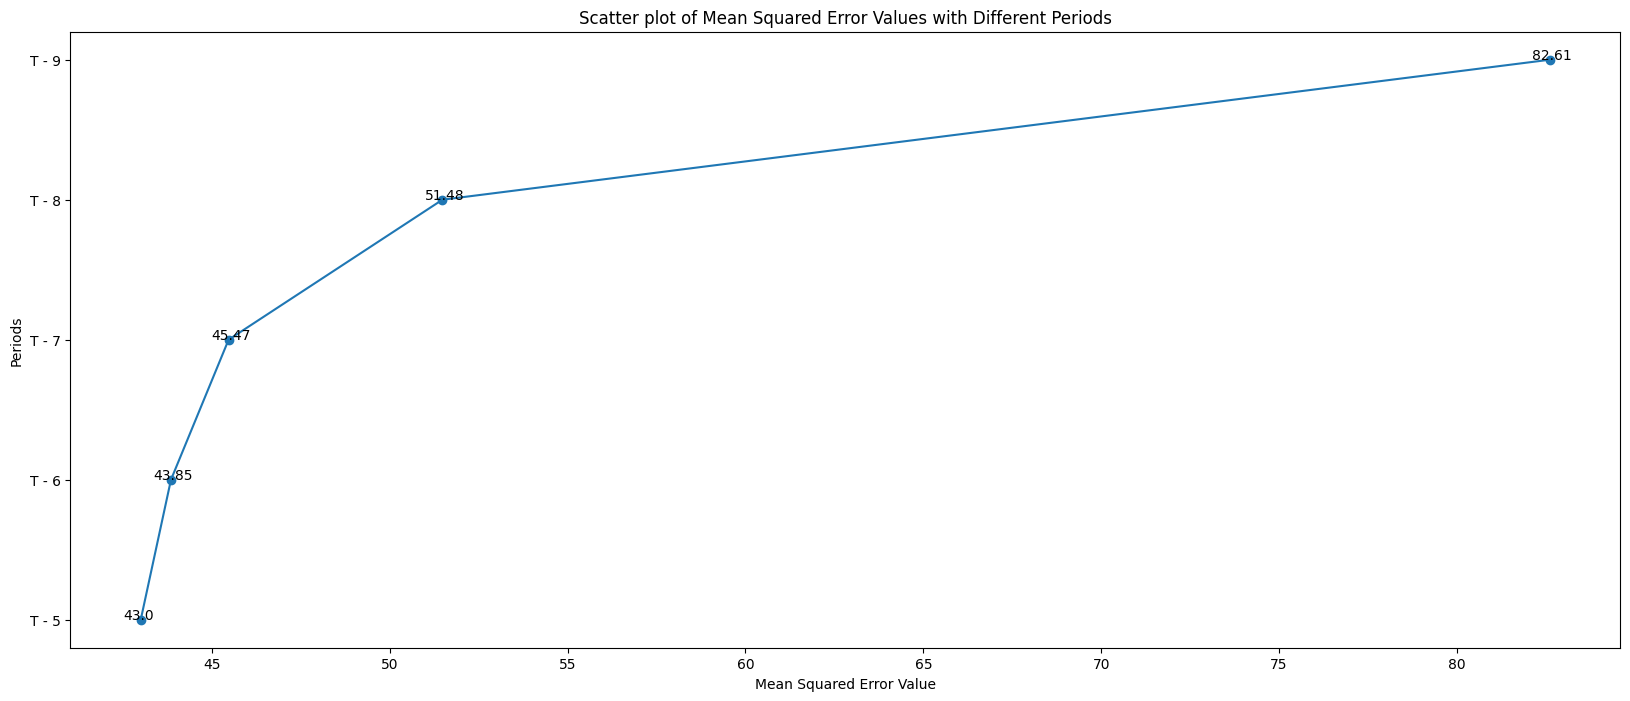

In [101]:
fig, ax = plt.subplots(figsize=(20,8))

x = results['MSE']
y =  ['T - 5', 'T - 6', 'T - 7', 'T - 8', 'T - 9']
ax.plot(x, y, '-o')
ax.set_xlabel('Mean Squared Error Value')
ax.set_ylabel('Periods')
ax.set_title('Scatter plot of Mean Squared Error Values with Different Periods')

# Label each point in the coordinate system
for i, txt in enumerate(results['MSE']):
    ax.annotate(txt,(x[i], y[i]), xytext=(x[i] - 0.5, y[i]))

plt.show()

So, we notice that when we make a sooner prediction, the mean squared error value increases. So, it is the least when we make a prediction at (T-5) and the highest when we make a prediction at (T-9).

Therefore, **the sooner the prediction, the larger the error**.

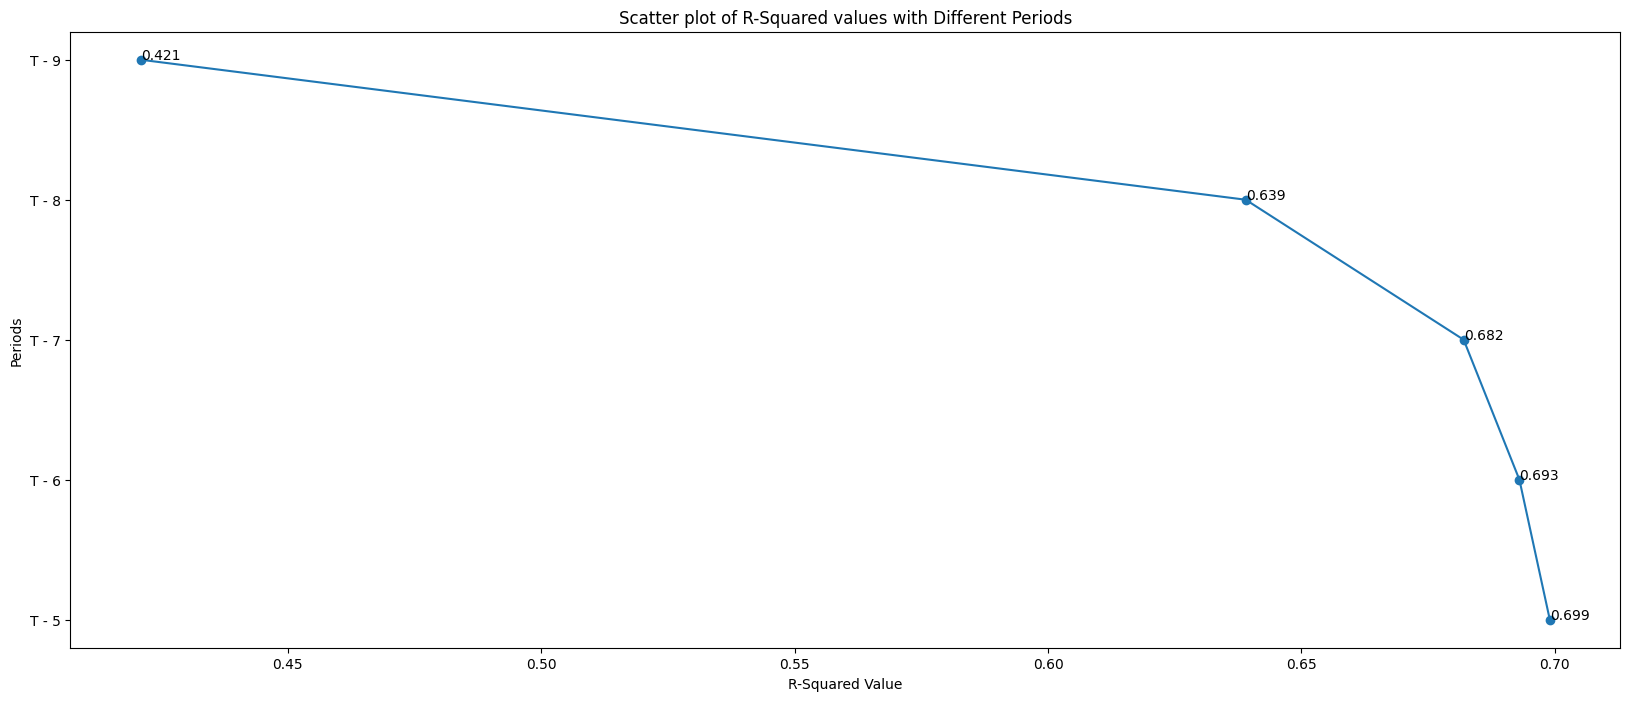

In [102]:
fig, ax = plt.subplots(figsize=(20,8))

x = results['R-squared']
y =  ['T - 5', 'T - 6', 'T - 7', 'T - 8', 'T - 9']
ax.plot(x, y, '-o')
ax.set_xlabel('R-Squared Value')
ax.set_ylabel('Periods')
ax.set_title('Scatter plot of R-Squared values with Different Periods')

# Label each point in the coordinate system
for i, txt in enumerate(x):
    ax.annotate(txt,(x[i], y[i])) 

plt.show()

So, we notice that when we make a sooner prediction, the R squared value decreases. So, it is the least when we make a prediction at (T-9) and the highest when we make a prediction at (T-5). 

Therefore, **the R-squared value decreases with sooner predictions**

In conclusion, the (T - 5) model performs the best as it has the highest R-squared value and the lowest MSE value. 
<br>
So, we choose **(T - 5) as the predictor variable**

### Part 3: Time-Series vs. Regression
#### The provided data includes the number of surgeries scheduled to be performed on a specific date prior to the surgery (actual) date. As discussed in the lecture, there is a strong correlation between the predictor variables (columns in the data)

#### Q.1.  To reduce the correlation, consider add-on surgeries (the difference between two columns) as new predictors and develop a new regression model. Implement the following models and compare them with the models discussed in the lecture. (15%) 
* Model 1: Does not stratify by the day of the week.
* Model 2: Stratified by the day of the week.

Here, we compute the differences between the columns and store the new dataframe with differences as the predictor variables in it

In [36]:
data = surgery_original_data
surgery_diff_data = pd.DataFrame(columns = data.columns)
surgery_diff_data[['SurgDate', 'DOW']] = surgery_original_data[['SurgDate', 'DOW']]
surgery_diff_data.iloc[:, 2:] = surgery_original_data.iloc[:, 2:].diff(axis = 1)
surgery_diff_data


C:\Users\Kavya\AppData\Local\Temp\ipykernel_8236\1923843220.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  surgery_diff_data.iloc[:, 2:] = surgery_original_data.iloc[:, 2:].diff(axis = 1)


,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,NaN,7,15,3,2,5,3,0,0,7,4,5,5,4,2,4,2
1,2011-10-11,Tue,NaN,12,18,3,10,4,0,0,4,3,3,3,4,0,0,15,7
2,2011-10-12,Wed,NaN,17,11,8,10,0,0,2,13,7,2,5,1,0,4,8,12
3,2011-10-13,Thu,NaN,20,17,5,2,0,0,10,5,4,3,0,0,3,1,5,11
4,2011-10-14,Fri,NaN,9,10,0,0,4,8,6,3,2,0,0,5,5,4,7,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2012-09-10,Mon,NaN,16,19,3,11,2,2,0,0,0,5,6,4,2,6,1,8
237,2012-09-11,Tue,NaN,25,12,2,4,4,0,0,0,2,8,6,3,1,0,1,9
238,2012-09-12,Wed,NaN,10,20,9,3,1,0,0,3,3,8,3,0,1,4,11,6
239,2012-09-13,Thu,NaN,17,17,9,-2,0,0,4,10,3,6,1,0,-2,4,5,8


In [37]:
surgery_diff_data = surgery_diff_data.drop(['T - 28'], axis=1)

Implementing Model 1: Does not stratify by the day of the week and including all the new predictor variables
Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at all $({T})$ 's)
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-21)} + \beta_{2} * x_{(T-14)} + \beta_{3} * x_{(T-13)} + ... + \beta_{15} * x_{(T-1)}$

In [38]:
x_data = surgery_diff_data.iloc[:, 2:]
y_data = surgery_diff_data[['Actual']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

0.2552083333333333

In [141]:
model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test)

results_new = pd.DataFrame(columns=['Model', 'MSE', 'Coefficient', 'Intercept', 'R-squared'])

mse = mean_squared_error(y_test.values, predictions)
r_squared = model.score(x_test, y_test)
coeff = model.coef_[0][0]
intercept = model.intercept_[0]

new_row = pd.DataFrame({'Model':'Not Stratified', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results_new['MSE'].size])
    
results_new = pd.concat([results_new, new_row], ignore_index=True)
results_new

,Model,MSE,Coefficient,Intercept,R-squared
0,Not Stratified,4.336953e-29,-5.804117e-18,1.776357e-15,1.0


Implementing Model 2: Stratified by the day of the week and including all the new predictor variables
Final Case Volume = Intercept + (Coefficient) * (Cases Scheduled at all $({T})$ 's) + (Coefficient) * (1 if cases scheduled on Mon) + (Coefficient) * (1 if cases scheduled on Tue) + (Coefficient) * (1 if cases scheduled on Wed) + (Coefficient) * (1 if cases scheduled on Thu) + (Coefficient) * (1 if cases scheduled on Fri) 
<br>
Y = $\beta_{0} + \beta_{1} * x_{(T-21)} + \beta_{2} * x_{(T-14)} + \beta_{3} * x_{(T-13)} + ... + \beta_{15} * x_{(T-1)} + \beta_{Mon} * x_{(Mon)} + \beta_{Tue} * x_{(Tue)} + ... + \beta_{Fri} * x_{(Fri)}$

In [142]:
x_data_encoded = pd.get_dummies(surgery_diff_data, columns=['DOW'])
x_data = x_data_encoded.iloc[:, 1:]
y_data = x_data_encoded[['Actual']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

model = LinearRegression().fit(x_train, y_train)
predictions = model.predict(x_test)

mse = mean_squared_error(y_test.values, predictions)
r_squared = model.score(x_test, y_test)
coeff = model.coef_[0][0]
intercept = model.intercept_[0]

new_row = pd.DataFrame({'Model':'Stratified by DOW', 'MSE': mse, 'Coefficient': coeff, 'Intercept': intercept, \
                        'R-squared': r_squared}, index=[results_new['MSE'].size])
    
results_new = pd.concat([results_new, new_row], ignore_index=True)
results_new

,Model,MSE,Coefficient,Intercept,R-squared
0,Not Stratified,4.336953e-29,-5.804117e-18,1.776357e-15,1.0
1,Stratified by DOW,8.564730e-30,1.099772e-16,-4.440892e-15,1.0


* These two models exhibit a very low mean squared error compared to the models computed in the previous question as we are taking multiple variables into the problem. 
* Including the one-hot encoded variables in the stratified model increases the error by a bit but keeps the r-squared value constant at 1 (on the test data) - showing high generalization over the data.

Comparing Models 1 and 2 here with Models 1 and 2 discussed in class
|  | Models implemented here | Models implemented in class |
| --- | --- | --- |
| Model 1 | This model considers only the add-on surgeries. Hence, the correlation factor is removed and simultaneously, the feature size (number of independent variables) is increased. This leads to good generalization over the data. | This model considers only the latest day's number of surgeries. Here, the correlation factor is removed because we consider only one variable but we ignore the effects of how the differences in each day's number of surgeries change over the year. Hence, lower generalization and higher simplification. |
| Model 2 | This model considers the stratification day-wise and includes the daily changes in the number of surgeries. Leads to higher genralization along with observing a pattern over the days of the week | This model considers the stratification day-wise but also ignores the daily changes in the number of surgeries. Lower genralization but a pattern is observed for the days of the week |

#### Q.2. Consider the surgery (actual) date as a time series with September 4th to September 14th as the testing set and the rest as the training set. Fit a Moving Average (MA) model to the time series and visualize it. (15%)

Visualizing the Time Series

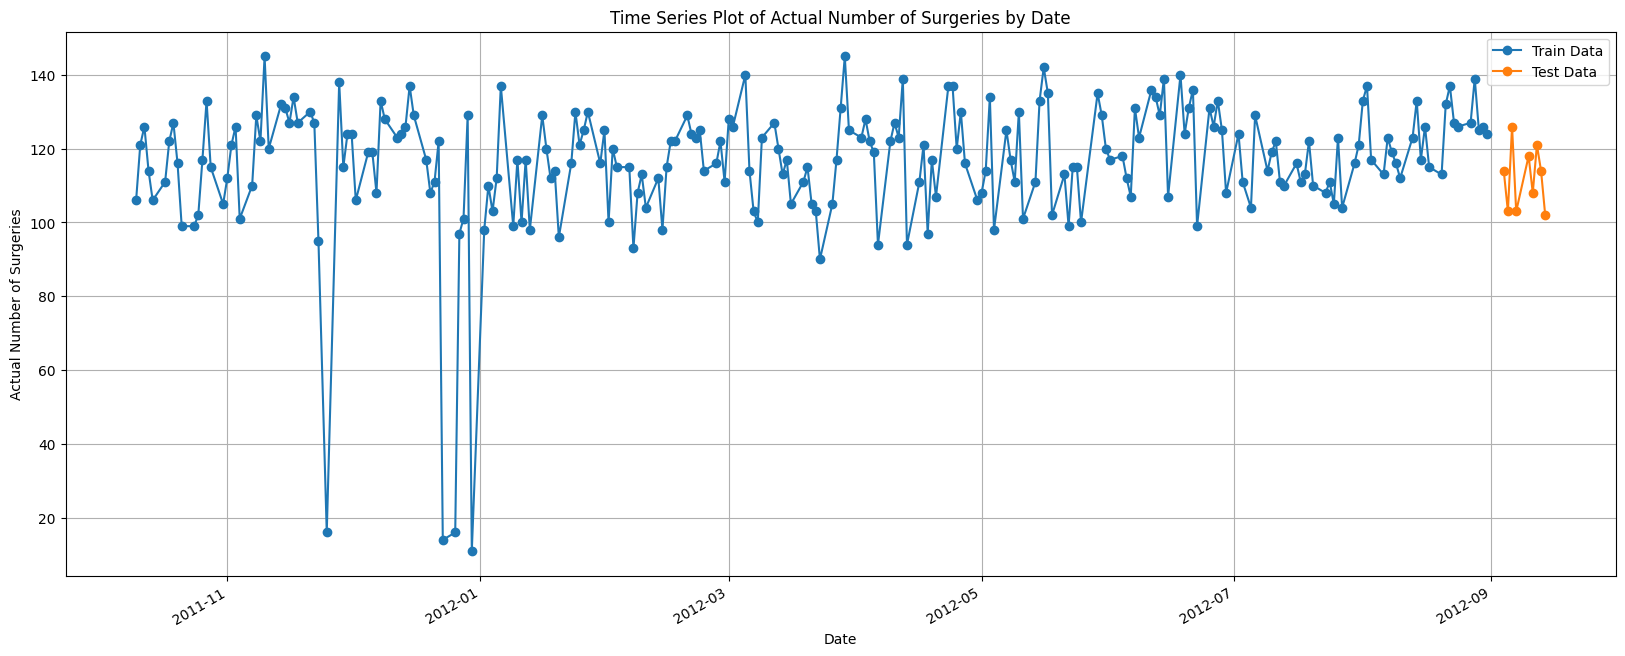

In [6]:
fig, ax = plt.subplots(figsize=(20,8))
train_data = surgery_original_data[(surgery_original_data['SurgDate'] < '2012-09-04')  | \
                      (surgery_original_data['SurgDate'] > '2012-09-14')][['SurgDate', 'DOW', 'Actual']]
test_data = surgery_original_data[(surgery_original_data['SurgDate'] >= '2012-09-04')  & \
                      (surgery_original_data['SurgDate'] <= '2012-09-14')][['SurgDate', 'DOW', 'Actual']]
bp = train_data.plot(x='SurgDate', y='Actual', kind='line', style='o-', ax=ax)
bp = test_data.plot(x='SurgDate', y='Actual', kind='line', style='o-', ax=ax)
plt.xlabel('Date')
plt.ylabel('Actual Number of Surgeries')
plt.title('Time Series Plot of Actual Number of Surgeries by Date')
plt.grid(True)
plt.legend(["Train Data", "Test Data"])

Forecasting the Actual Number from Train and Test Data

In [41]:
train_len = len(train_data)
for i in range(5):
    train_data['SMA_{}'.format(i+1)] = train_data['Actual'].rolling(window=i+1).mean() 
    last_ma = train_data.loc[train_data.index[-1], "SMA_{}".format(i+1)]
    test_data['SMA_{}'.format(i+1)] = last_ma

for i in range(5):
    last_ma = train_data.loc[train_data.index[-1], "SMA_{}".format(i+1)]
    test_data['SMA_{}'.format(i+1)] = last_ma
total_data = pd.concat([train_data, test_data], ignore_index=True)
print(total_data)

      SurgDate  DOW  Actual  SMA_1  SMA_2       SMA_3   SMA_4  SMA_5
0   2011-10-10  Mon     106  106.0    NaN         NaN     NaN    NaN
1   2011-10-11  Tue     121  121.0  113.5         NaN     NaN    NaN
2   2011-10-12  Wed     126  126.0  123.5  117.666667     NaN    NaN
3   2011-10-13  Thu     114  114.0  120.0  120.333333  116.75    NaN
4   2011-10-14  Fri     106  106.0  110.0  115.333333  116.75  114.6
..         ...  ...     ...    ...    ...         ...     ...    ...
236 2012-09-10  Mon     118  124.0  125.0  125.000000  128.50  128.2
237 2012-09-11  Tue     108  124.0  125.0  125.000000  128.50  128.2
238 2012-09-12  Wed     121  124.0  125.0  125.000000  128.50  128.2
239 2012-09-13  Thu     114  124.0  125.0  125.000000  128.50  128.2
240 2012-09-14  Fri     102  124.0  125.0  125.000000  128.50  128.2

[241 rows x 8 columns]


Visualization of MA over varying window lengths

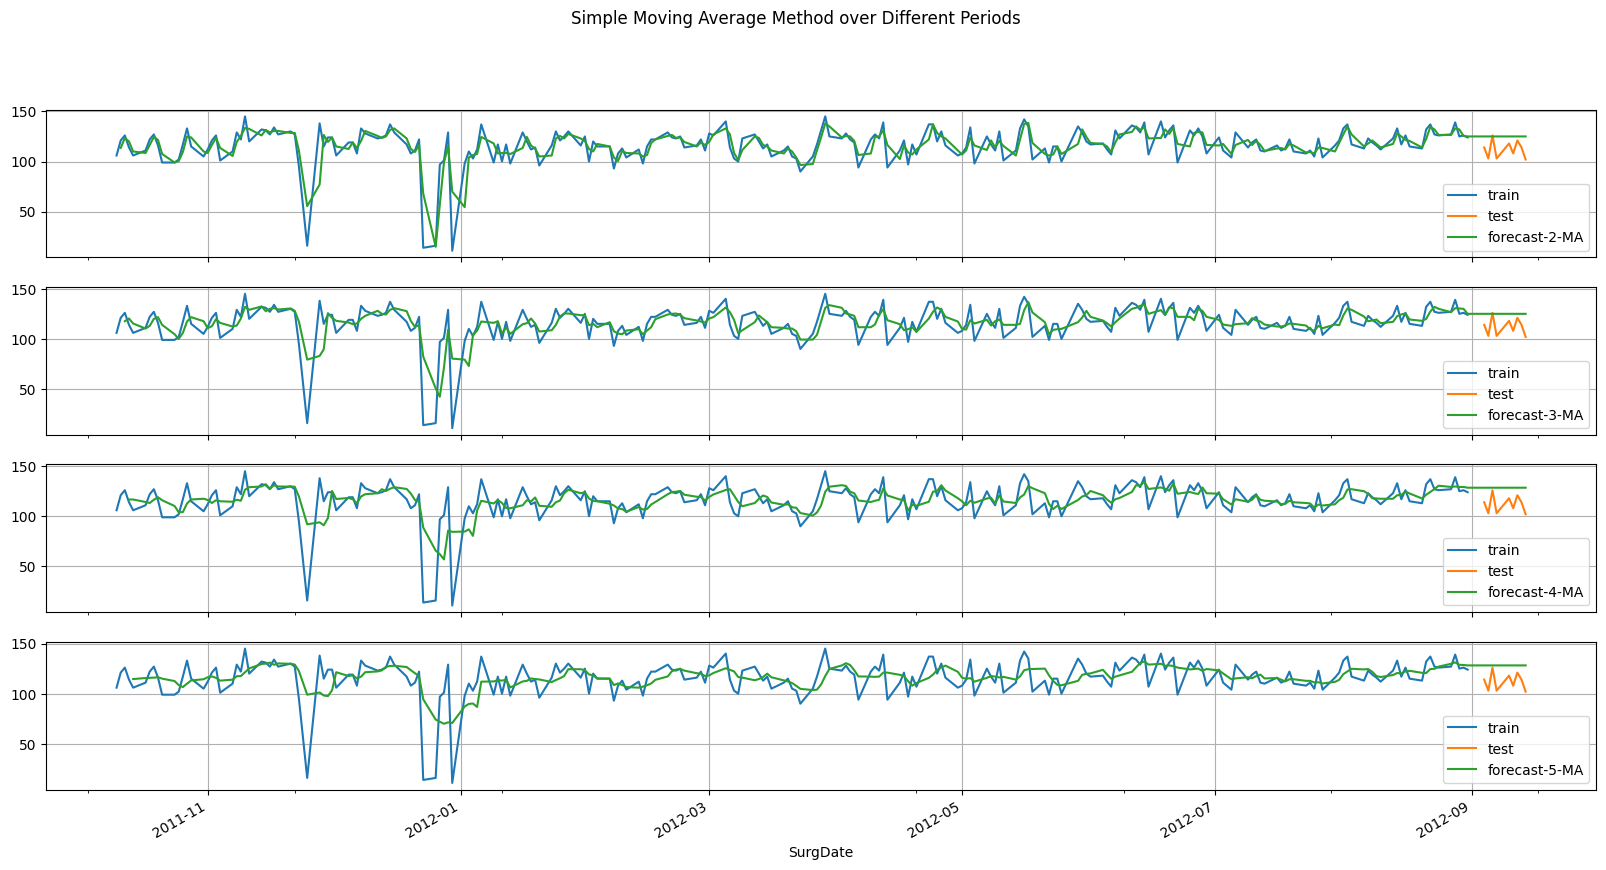

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex = True, figsize=(20,10))
ax = [ax1, ax2, ax3, ax4]
plt.suptitle('Simple Moving Average Method over Different Periods')
for i in range(4):
    train_data.plot(x='SurgDate', y='Actual', kind='line', ax=ax[i])
    test_data.plot(x='SurgDate', y='Actual', kind='line', ax=ax[i])
    total_data.plot(x='SurgDate', y='SMA_{}'.format(i+2), kind='line', ax=ax[i])

    ax[i].legend(['train', 'test', 'forecast-{}-MA'.format(i+2)], loc='lower right')
    ax[i].grid()

Calculating the MSE of the MA models with different window sizes

In [21]:
results_ma = pd.DataFrame(columns=['Method', 'MSE', 'Moving Average Window'])

for i in range(2, 6):
    mse = mean_squared_error(test_data['Actual'], test_data['SMA_{}'.format(i)])
    # print(rmse)
    mad = np.mean(np.abs(test_data['Actual']-test_data['SMA_{}'.format(i)]))
    # print(mad)
    mape = np.mean(np.abs((test_data['Actual']-test_data['SMA_{}'.format(i)])/test_data['Actual'])*100)
    # print(mape)
    new_row = pd.DataFrame({'Method':'Simple moving average forecast', 'MSE': mse, 'Moving Average Window': i}, index=[results_ma['MSE'].size])
        
    results_ma = pd.concat([results_ma, new_row], ignore_index=True)
results_ma

,Method,MSE,Moving Average Window
0,Simple moving average forecast,232.666667,2
1,Simple moving average forecast,232.666667,3
2,Simple moving average forecast,335.138889,4
3,Simple moving average forecast,325.395556,5


We see that the best highest window size that well-smoothens the curve and ensures lower error is `window length = 3`. 

#### Q.3. Compare the result of the regression model with the MA model visually and based on MSE. Which model provides a better prediction? What could be the potential reason? (10%)

So, we will use the 3-day MA model to compare with the LR model (T-5) - both well-performing models

| Linear Regression Model | Simple Moving Average Model |
| --- | --- |
| Visually, the linear regression model seems like generalizing over the data better | Whereas, the simple moving average model tends to smoothen out the fluctuations but generalizes very little |
| The MSE for the regression model says that there is very little error while working on the test dataset | Here, there is a huge error observed in the simple moving average forecast |


Hence, the linear regression model performs better than the MA model both visually and based on MSE. 
* This is because there is high volatility in the data and there is no stationarity observed (underlying trends may need to be removed). In such cases, the MA models perform worse.
* Secondly, the split in the train and test data in the case of linear regression model is 80:20 (train:test) while in the MA model, it is 96:4 (train:test)

Therefore, Linear regression is preferred over Moving Average when a more accurate representation of the underlying trend in the data is required and when the data exhibits a linear relationship between the independent and dependent variables. 